In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import os
import matplotlib.pyplot as plt

In [2]:
#CRIANDO UMA LISTA QUE CONTÉM TODOS OS TICKER DOS PEERS DIRETOS DO GARE,PARA FAZER UM ACOMPANHAMENTO MAIS PROXIMO
PEERS_DIRETOS = ['KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA',
                 'HGRU11.SA', 'TRXF11.SA', 'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA',
                 'BTLG11.SA', 'XPLG11.SA', 'BRCO11.SA', 'LVBI11.SA', 'VILG11.SA', 'GARE11.SA']
TIJOLO = ['HIB Tijolo', 'XXXX', 'Renda Urbana', 'Logistico', 'Shopping', 'Lajes', 'Outros Imóveis']

In [3]:
#PUXO A BASE DE ATIVOS BASE QUE EU USO PARA FAZER AS ANALISES 
df_ativos = pd.read_excel('Base_ativos.xlsx')

#CRIO UMA FUNÇÃO PARA EXCLUIR A PARTE DO TICKER ".SA"
def excluir_5_dig(COTA):
    return str(COTA)[:6]

#CRIO UMA FUNÇÃO PARA IDENTIFICAR OS PEERS DO GARE11 NA TABELA
def peers(x):
    if x in PEERS_DIRETOS:
        return 'PEER'
    else:
        return 'NAO PEER'
    
def tijolo_papel(x):
    if x == 'Recebivel':
        return "Papel"
    elif x == "XXXX":
        return "GARE11"
    else:
        return "Tijolo"


def pl_maior_500000000(patri):
    if patri > 500000000:
        return "MAIOR"
    else:
        return "MENOR"
    
def liq_maior_1MM(liq):
    if liq > 1000000:
        return "MAIOR"
    else:
        return "MENOR"

In [4]:
df_ativos['PL>500MM'] = df_ativos["VP"].apply(pl_maior_500000000)
df_ativos['LIQ>1MM'] = df_ativos["LIQUIDEZ"].apply(liq_maior_1MM)
df_ativos

,TICKER,NOME FUNDO,TIPO,VP,COTAS EMITIDAS,COTA - 2024,COTA - 2023,LTM,COTA NOV,DIV - Y1,DIV- Y3,DIV - LTM,IFIX,COTISTAS,LIQUIDEZ,PL>500MM,LIQ>1MM
0,KNRI11.SA,Kinea Renda Imobiliária,HIB Tijolo,4.553042e+09,28204047,165.50,139.81,159.50,131.80,1.0000,3.000000,12.000000,0.0297,287624,6.071877e+06,MAIOR,MAIOR
1,TVRI11.SA,Tivio Renda Imobiliária,HIB Tijolo,1.614022e+09,15919690,97.84,84.10,94.35,90.00,0.9800,2.940000,11.630000,0.0113,68471,1.506131e+06,MAIOR,MAIOR
2,ALZR11.SA,Alianza Trust Renda Imobiliária,HIB Tijolo,1.279322e+09,12226625,117.64,110.76,114.29,99.67,0.8055,2.312499,9.156493,0.0091,153709,1.988025e+06,MAIOR,MAIOR
3,GARE11.SA,Guardian Real Estate,XXXX,1.350740e+09,147458223,9.34,9.28,9.29,8.90,0.0920,0.274000,1.050000,0.0079,279258,9.105665e+06,MAIOR,MAIOR
4,RBRP11.SA,RBR Properties FII,HIB Tijolo,9.339984e+08,12179186,54.80,48.51,51.64,49.99,0.5400,1.600000,5.990000,0.0049,77359,1.259372e+06,MAIOR,MAIOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,KIVO11.SA,Kilima Volcano Recebíveis,Recebivel,1.965423e+08,2222736,9.50,8.50,9.15,71.83,0.9000,2.620000,12.020000,0.0013,6522,6.268636e+05,MENOR,MENOR
112,SPXS11.SA,SPX SYN Multiestratégia,Recebivel,1.884556e+08,20189040,9.08,9.19,9.06,9.00,0.1000,0.301000,1.164000,0.0012,19334,4.988222e+05,MENOR,MENOR
113,ARRI11.SA,Átrio Reit Recebíveis Imobiliários,Recebivel,1.726284e+08,20138980,9.78,8.89,9.33,8.69,0.0900,0.270000,1.180000,0.0011,25875,6.555622e+05,MENOR,MENOR
114,CYCR11.SA,Cyrela Crédito,Recebivel,3.428976e+08,36549445,9.09,8.80,8.94,8.58,0.0950,0.265000,1.245000,0.0000,19647,7.552071e+05,MENOR,MENOR


In [5]:
df_TIJOLO = df_ativos[df_ativos['TIPO'].isin(TIJOLO) & (df_ativos['VP'] > 500000000)]

In [6]:
tic = 'TICKER'
liq = 'LIQUIDEZ'
cotistas = 'COTISTAS'
pl = 'VP'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ = df_TIJOLO[[tic, liq]]
TOP10_LIQUIDEZ['LIQUIDEZ'] = TOP10_LIQUIDEZ['LIQUIDEZ'].round(0)
TOP10_LIQUIDEZ = TOP10_LIQUIDEZ.sort_values(by=['LIQUIDEZ'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ['TICKER'] = TOP10_LIQUIDEZ['TICKER'].apply(excluir_5_dig)
TOP10_LIQUIDEZ

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18096\647270576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP10_LIQUIDEZ['LIQUIDEZ'] = TOP10_LIQUIDEZ['LIQUIDEZ'].round(0)


,TICKER,LIQUIDEZ
27,XPML11,14034318.0
3,GARE11,9105665.0
12,BTLG11,9085304.0
11,HGLG11,8280708.0
0,KNRI11,6071877.0
7,HGRU11,6027259.0
36,PVBI11,5709337.0
8,TRXF11,5673804.0
28,VISC11,5450834.0
50,RZTR11,5449347.0


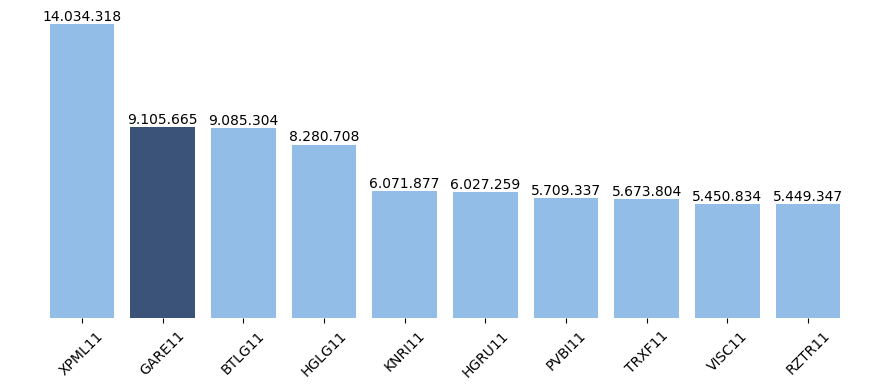

In [7]:
import matplotlib.pyplot as plt

# Dados fornecidos
data = TOP10_LIQUIDEZ

# Criar o DataFrame
df = pd.DataFrame(data)

# Definir as cores para destacar o GARE11.SA
cores = ['#91BDE7' if fundo != 'GARE11' else '#3B5279' for fundo in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQUIDEZ'], color=cores)

# Adicionar rótulos de barra com separadores de milhares (usando ponto)
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura + 50000,  # Ajuste de posição vertical
        f'{altura:,.0f}'.replace(',', '.'),  # Formatar com separador de milhares como ponto
        ha='center', va='bottom', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_title('', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

fig.savefig('TOP10_LIQUIDEZ.png', transparent = True, dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [8]:
tic = 'TICKER'
cotistas = 'COTISTAS'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_cotistas = df_TIJOLO[[tic, cotistas]]
TOP10_cotistas = TOP10_cotistas.sort_values(by=['COTISTAS'], ascending=False).iloc[:10, :]
TOP10_cotistas['TICKER'] = TOP10_cotistas['TICKER'].apply(excluir_5_dig)
TOP10_cotistas

,TICKER,COTISTAS
27,XPML11,560633
11,HGLG11,490351
12,BTLG11,365957
28,VISC11,349377
13,XPLG11,344326
0,KNRI11,287624
3,GARE11,279258
7,HGRU11,208651
30,HSML11,195323
8,TRXF11,184014


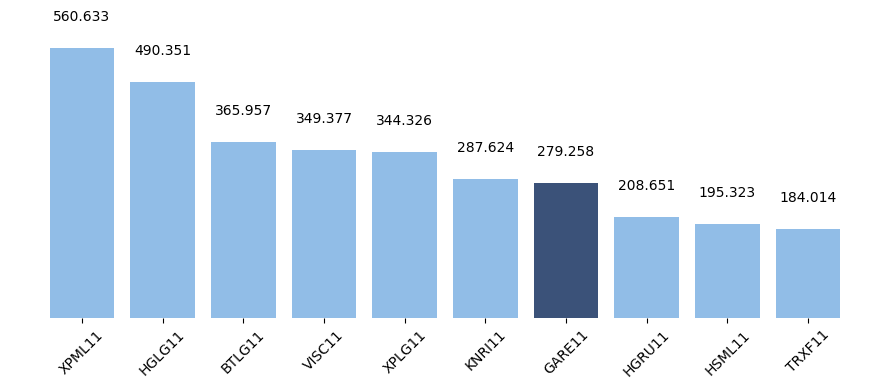

In [9]:
# Dados fornecidos
data = TOP10_cotistas

# Criar o DataFrame
df = pd.DataFrame(data)

# Definir as cores para destacar o GARE11.SA
cores = ['#91BDE7' if fundo != 'GARE11' else '#3B5279' for fundo in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['COTISTAS'], color=cores)

# Adicionar rótulos de barra com separadores de milhares (usando ponto)
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura + 50000,  # Ajuste de posição vertical
        f'{altura:,.0f}'.replace(',', '.'),  # Formatar com separador de milhares como ponto
        ha='center', va='bottom', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_title('', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

fig.savefig('TOP10_COTISTAS.png', transparent = True, dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [10]:
tic = 'TICKER'
liq = 'LIQUIDEZ'
pl = 'VP'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQxPL = df_TIJOLO[[tic, liq, pl]]
TOP10_LIQxPL['VP'] = TOP10_LIQxPL['VP']/1000
TOP10_LIQxPL['LIQUIDEZ'] = TOP10_LIQxPL['LIQUIDEZ']/1000
TOP10_LIQxPL['LIQUIDEZ'] = TOP10_LIQxPL['LIQUIDEZ'].round(0)
TOP10_LIQxPL['VP'] = TOP10_LIQxPL['VP'].round(0)
TOP10_LIQxPL['LIQ/PL'] = TOP10_LIQxPL['LIQUIDEZ']/TOP10_LIQxPL['VP']
TOP10_LIQxPL = TOP10_LIQxPL.sort_values(by=['LIQ/PL'], ascending=False).iloc[:10, :]
TOP10_LIQxPL['TICKER'] = TOP10_LIQxPL['TICKER'].apply(excluir_5_dig)

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18096\42529915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP10_LIQxPL['VP'] = TOP10_LIQxPL['VP']/1000
C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18096\42529915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP10_LIQxPL['LIQUIDEZ'] = TOP10_LIQxPL['LIQUIDEZ']/1000
C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18096\42529915.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

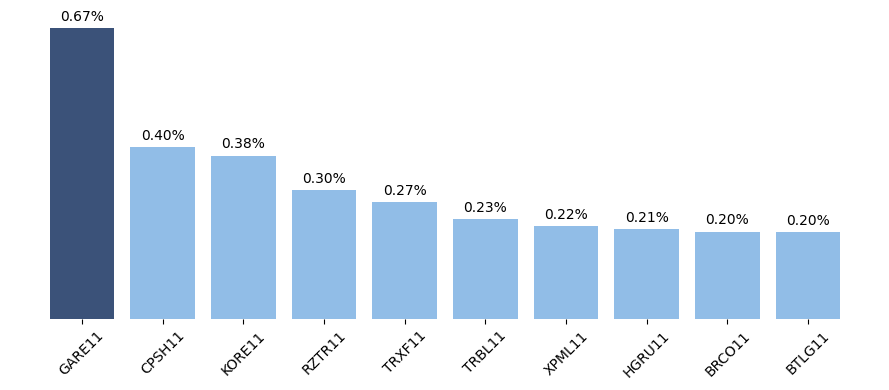

In [11]:
data = TOP10_LIQxPL

# Criar o DataFrame
df = pd.DataFrame(data)

cores = ['#3B5279' if ticker == 'GARE11' else '#91BDE7' for ticker in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQ/PL'], color=cores)

# Adicionar rótulos de barra como porcentagem
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura + 0.0001,  # Ajuste de posição vertical
        f'{altura:.2%}',  # Formatar como porcentagem
        ha='center', va='bottom', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

fig.savefig('TOP10_LIQxPL.png', transparent=True, dpi=300, bbox_inches = 'tight')

# Exibir o gráfico
plt.show()

In [12]:
#CRIO VARIAVES PARA ARMAZENAR AS DATAS QUE PRECISO PEGAR OS PREÇOS DAS COTAS DOS FUNDOS
d_1 = datetime(2024, 12, 18, 17, 5, 0)
d_2 = datetime(2024, 12, 17, 17, 5, 0)
d_now = datetime.now()

#CRIO A COLUNA DE PREÇO COTA E DEIXO ELA VAZIA PARA ARMAZENAR COM OS PREÇOS DAS COTAS QUE SERÃO PUXADAS PELA FUNÇÃO
df_ativos['PREÇO COTA'] = None

#COLOCO A COLUNA 'TICKER' COMO O INDEX DA COLUMA E CRIO A FUNÇÃO PARA PASSAR POR TODOS OS DADOS PRESENTE NA COLUNA TICKER
for index, row in df_ativos.iterrows():
    #INSIRO OS TICKER PRESENTE NO DF DENTRO DA VARIAVEL TICKER, USANDO O FOR PARA CRIAR O LAÇO DE REPETIÇÃO
    ticker = row['TICKER']
    
    try:
        #USANDO O YAHOO FINANCE EU ARMAZENO OS TICKERS DENTRO DA VARIAVEL
        fundo = yf.Ticker(ticker)
        
        #BUSCO O HISTORICO DOS ULTIMOS DOIS DIAS (D0 E D-2)
        historico = fundo.history(start=d_2, end=d_1)  #INCLUINDO OS ULTIMOS DOIS DIAS
        
        #GARANTINDO QUE TENHO DADOS OS= SUFICIENTE PARA FAZER A ANALISE
        if len(historico) >= 1:
            #EXTRAINDO O PREÇO DE FECHAMENTO MAIS RECENTE DISPONIVEL
            preco_fechamento_ontem = historico['Close'].iloc[-1]
            
            #ARMAZENO O PREÇO DE FECHAMENTO NA COLUNA DE PREÇO COTA QUE ANTERIORMENTE ESTAVA VAZIA
            df_ativos.at[index, 'PREÇO COTA'] = round(preco_fechamento_ontem, 2)
        else:
            #SE NÃO POSSUI DADOS O SUFICIENTE O PREÇO COTA DO TICKER É ARMAZENADO COMO NaN
            df_ativos.at[index, 'PREÇO COTA'] = None
    
    except Exception as e:
        df_ativos.at[index, 'PREÇO COTA'] = f'Erro: {e}'


#-------------------------------------------------------FAZENDO O MESMO PROCESSO, MAS BUSCANDO O PREÇO DO DIA ANTERIOR AO BUSCADO ACIMA-------------------------------------------------------

#CRIO A COLUNA DE PREÇO COTA D_2 QUE VAI ARMAZENAR O PREÇO DA COTA DE FECHAMENTO DO PENULTIMO DIA
df_ativos['PREÇO COTA_D_2'] = None

#PASSO POR TODOS OS TICKERS E OS ARMAZENO DENTRO DA VARIAVEL ticker
for index, row in df_ativos.iterrows():
    ticker = row['TICKER']
    
    try:
        # OBTENHO O HISTÓRICO DO FUNDO PARA O ULTIMO DIA O ULTIMO DIA DE FECHAMENTO
        fundo = yf.Ticker(ticker)
        historico_2 = fundo.history(start = d_2, end = d_1)  

        #VERIFICAR SE A DADOS SUFICIENTES PARA ANALISAR A OPERAÇÃO
        if len(historico) >= 1:
            preco_fechamento_anteontem = historico_2['Close'].iloc[0]
            df_ativos.at[index, 'PREÇO COTA_D_2'] = round(preco_fechamento_anteontem, 2)
        else:
            df_ativos.at[index, 'PREÇO COTA_D_2'] = 0
    
    except Exception as e:
        df_ativos.at[index, 'PREÇO COTA_3'] = 'Erro'

$BTHF11.SA: possibly delisted; no price data found  (1d 2024-12-17 17:05:00 -> 2024-12-18 17:05:00)
$BTHF11.SA: possibly delisted; no price data found  (1d 2024-12-17 17:05:00 -> 2024-12-18 17:05:00)


In [13]:
#CALCULANDO PREÇO DA COTA D-1, D-2 E VARIAÇÃO
GARE11=yf.Ticker('GARE11.SA')
print('Dia anterior {:%Y-%m-%d}, dois dias atras {:%Y-%m-%d}'.format(d_1, d_2))

#COTA DE D-1 ---> o preço que vai retornar dessa função é o preço que eu coloco como start
cota_d_1 = GARE11.history(start = d_1, end = d_now)['Close'].iloc[0]
#COTA DE D-2
cota_d_2 = GARE11.history(start = d_2, end=d_1)['Close'].iloc[-2]
#VARIAÇÃO
VAR = ((cota_d_1-cota_d_2)/cota_d_2)*100
#COTA DE D-1 MAXIMO
maximo_d_1 = GARE11.history(start = d_1, end = d_now)['High'].iloc[0]
#COTA DE D-1 MINIMO
minimo_d_1 = GARE11.history(start = d_1, end = d_now)['Low'].iloc[0]

print('DATA: {:%Y-%m-%d}: VALOR DA COTA {:.2f}'.format(d_1, cota_d_1))
print('DATA: {:%Y-%m-%d}: VALOR DA COTA {:.2f}'.format(d_2, cota_d_2))
print('DATA: {:%Y-%m-%d}: MAXIMO {:.2F}'. format(d_1, maximo_d_1))
print('DATA: {:%Y-%m-%d}: MINIMO {:.2F}'. format(d_1, minimo_d_1))
print('VARIAÇÃO: {:.2f}%'.format(VAR))

Dia anterior 2024-12-18, dois dias atras 2024-12-17
DATA: 2024-12-18: VALOR DA COTA 8.01
DATA: 2024-12-17: VALOR DA COTA 8.08
DATA: 2024-12-18: MAXIMO 8.16
DATA: 2024-12-18: MINIMO 7.98
VARIAÇÃO: -0.87%


In [14]:
data = {'Preço_D-1':[cota_d_1],
        'Preço_D-2':[cota_d_2],
        'Var':[VAR],
        'Maximo':[maximo_d_1],
        'Minimo':[minimo_d_1],}

tab_GARE11 = pd.DataFrame(data)

tab_GARE11

,Preço_D-1,Preço_D-2,Var,Maximo,Minimo
0,8.01,8.08,-0.866333,8.16,7.98


In [15]:
df_ativos

,TICKER,NOME FUNDO,TIPO,VP,COTAS EMITIDAS,COTA - 2024,COTA - 2023,LTM,COTA NOV,DIV - Y1,DIV- Y3,DIV - LTM,IFIX,COTISTAS,LIQUIDEZ,PL>500MM,LIQ>1MM,PREÇO COTA,PREÇO COTA_D_2,PREÇO COTA_3
0,KNRI11.SA,Kinea Renda Imobiliária,HIB Tijolo,4.553042e+09,28204047,165.50,139.81,159.50,131.80,1.0000,3.000000,12.000000,0.0297,287624,6.071877e+06,MAIOR,MAIOR,129.7,131.4,NaN
1,TVRI11.SA,Tivio Renda Imobiliária,HIB Tijolo,1.614022e+09,15919690,97.84,84.10,94.35,90.00,0.9800,2.940000,11.630000,0.0113,68471,1.506131e+06,MAIOR,MAIOR,80.99,81.3,NaN
2,ALZR11.SA,Alianza Trust Renda Imobiliária,HIB Tijolo,1.279322e+09,12226625,117.64,110.76,114.29,99.67,0.8055,2.312499,9.156493,0.0091,153709,1.988025e+06,MAIOR,MAIOR,94.69,96.12,NaN
3,GARE11.SA,Guardian Real Estate,XXXX,1.350740e+09,147458223,9.34,9.28,9.29,8.90,0.0920,0.274000,1.050000,0.0079,279258,9.105665e+06,MAIOR,MAIOR,8.01,8.08,NaN
4,RBRP11.SA,RBR Properties FII,HIB Tijolo,9.339984e+08,12179186,54.80,48.51,51.64,49.99,0.5400,1.600000,5.990000,0.0049,77359,1.259372e+06,MAIOR,MAIOR,48.6,49.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,KIVO11.SA,Kilima Volcano Recebíveis,Recebivel,1.965423e+08,2222736,9.50,8.50,9.15,71.83,0.9000,2.620000,12.020000,0.0013,6522,6.268636e+05,MENOR,MENOR,56.42,57.4,NaN
112,SPXS11.SA,SPX SYN Multiestratégia,Recebivel,1.884556e+08,20189040,9.08,9.19,9.06,9.00,0.1000,0.301000,1.164000,0.0012,19334,4.988222e+05,MENOR,MENOR,7.65,7.78,NaN
113,ARRI11.SA,Átrio Reit Recebíveis Imobiliários,Recebivel,1.726284e+08,20138980,9.78,8.89,9.33,8.69,0.0900,0.270000,1.180000,0.0011,25875,6.555622e+05,MENOR,MENOR,7.4,7.79,NaN
114,CYCR11.SA,Cyrela Crédito,Recebivel,3.428976e+08,36549445,9.09,8.80,8.94,8.58,0.0950,0.265000,1.245000,0.0000,19647,7.552071e+05,MENOR,MENOR,7.8,7.9,NaN


In [22]:
#GARANTO QUE A COLUNA 'PREÇO COTA' ESTÁ EM FLOAT
df_ativos['PREÇO COTA'] = df_ativos['PREÇO COTA'].astype(float)
#CRIO O COLUNA DE P/VP
df_ativos['P/VP'] = ((df_ativos['COTAS EMITIDAS']*df_ativos['PREÇO COTA'])/df_ativos['VP']).round(2)
#FAÇO MANIPULAÇÕES PARA COLOCAR AS COLUNAS DE DIVIDENDO COM DUAS CASAS DECIMAIS
df_ativos['DIV - Y1'] = df_ativos['DIV - Y1'].round(2)
df_ativos['DIV- Y3'] = df_ativos['DIV- Y3'].round(2)
df_ativos['DIV - LTM'] = df_ativos['DIV - LTM'].round(2)
#RETIRO AS COLUNAS INUTEIS
#df = df.drop(columns=['PREÇO COTA_3', 'NOME FUNDO'])
#CRIO UMA COPIA DO DATAFRAME PRA FAZER EVENTUAIS MANIPULAÇÕES
df_2 = df_ativos
#CRIO NOVAS COLUNAS DE VARIAÇÃO
df_2['VAR'] = (((df_2['PREÇO COTA'] - df_2['PREÇO COTA_D_2'])/df_2['PREÇO COTA_D_2'])*100).round(2)
df_2['VAR_ANO'] = ((df_2['PREÇO COTA']/df_2['COTA - 2024']-1)*100).round(2)
df_2['VAR_LTM'] = ((df_2['PREÇO COTA']/df_2['LTM']-1)*100).round(2)
df_2['VAR_MES'] = ((df_2['PREÇO COTA']/df_2['COTA NOV']-1)*100).round(2)
#REORGANIZO AS COLUNAS DO DATAFRAME
df_2 = df_2[['TICKER', 'TIPO', 'VP', 'COTAS EMITIDAS','P/VP', 'VAR', 'VAR_MES', 'VAR_ANO', 'VAR_LTM', 'PREÇO COTA', 'PREÇO COTA_D_2','LTM', 'COTA - 2024', 'COTA - 2023', 'COTA NOV',
         'DIV - Y1', 'DIV- Y3', 'DIV - LTM', 'IFIX']]
df_2['VP'] = (df_2['VP']/1000000).round(0)
df_2['VP'] = df_2['VP'].astype(int)
#CRIO AS COLUNAS DE DIVIDEND YIELD
df_2['DY - 1M'] = ((df_2['DIV - Y1']/df_2['PREÇO COTA'])*100).round(2)
df_2['DY - 3M'] = ((df_2['DIV- Y3']/df_2['PREÇO COTA'])*100).round(2)
df_2['DY - LTM'] = ((df_2['DIV - LTM']/df_2['PREÇO COTA'])*100).round(2)
#CRIO A COLUNA DE PEERS
df_2['PEERS'] = df['TICKER'].apply(peers)
#RETIRO COLUNAS QUE FICARAM INUTEIS
df_2 = df_2.drop(columns = ['COTA - 2024', 'COTA - 2023', 'COTA NOV', 'DIV - Y1', 'DIV- Y3', 'DIV - LTM'])
df_2 = df_2.rename(columns={'PREÇO COTA':'PRECO', 'PREÇO COTA_D_2':'PRECO_D2', 'DY - 1M':'DY-1M', 'DY - 3M':'DY-3M', 'DY - LTM':'DY-LTM'})

df_2['VAR'].astype(float)

df_2

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18096\3362194395.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['VP'] = (df_2['VP']/1000000).round(0)
C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18096\3362194395.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['VP'] = df_2['VP'].astype(int)
C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_18096\3362194395.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,TICKER,TIPO,VP,COTAS EMITIDAS,P/VP,VAR,VAR_MES,VAR_ANO,VAR_LTM,PRECO,PRECO_D2,LTM,IFIX,DY-1M,DY-3M,DY-LTM,PEERS
0,KNRI11.SA,HIB Tijolo,4553,28204047,0.80,-1.29376,-1.59,-21.63,-18.68,129.70,131.4,159.50,0.0297,0.77,2.31,9.25,NaN
1,TVRI11.SA,HIB Tijolo,1614,15919690,0.80,-0.381304,-10.01,-17.22,-14.16,80.99,81.3,94.35,0.0113,1.21,3.63,14.36,NaN
2,ALZR11.SA,HIB Tijolo,1279,12226625,0.90,-1.487724,-5.00,-19.51,-17.15,94.69,96.12,114.29,0.0091,0.86,2.44,9.67,NaN
3,GARE11.SA,XXXX,1351,147458223,0.87,-0.866337,-10.00,-14.24,-13.78,8.01,8.08,9.29,0.0079,1.12,3.37,13.11,NAO PEER
4,RBRP11.SA,HIB Tijolo,934,12179186,0.63,-1.078771,-2.78,-11.31,-5.89,48.60,49.13,51.64,0.0049,1.11,3.29,12.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,KIVO11.SA,Recebivel,197,2222736,0.64,-1.707317,-21.45,493.89,516.61,56.42,57.4,9.15,0.0013,1.60,4.64,21.30,NaN
112,SPXS11.SA,Recebivel,188,20189040,0.82,-1.670951,-15.00,-15.75,-15.56,7.65,7.78,9.06,0.0012,1.31,3.92,15.16,NaN
113,ARRI11.SA,Recebivel,173,20138980,0.86,-5.006418,-14.84,-24.34,-20.69,7.40,7.79,9.33,0.0011,1.22,3.65,15.95,NaN
114,CYCR11.SA,Recebivel,343,36549445,0.83,-1.265823,-9.09,-14.19,-12.75,7.80,7.9,8.94,0.0000,1.28,3.33,16.03,NaN


In [21]:
#CRIO UM DATAFRAME PARA ANALISAR APENAS OS PEERS DO GARE
df_3 = df_2[df_2['PEERS'] == 'PEER']
#EXCLUO COLUNAS INUTEIS
df_3 = df_3.rename(columns={'PREÇO COTA':'PRECO', 'PREÇO COTA_D_2':'PRECO_D2', 'DY - 1M':'DY-1M', 'DY - 3M':'DY-3M', 'DY - LTM':'DY-LTM'})
df_3 = df_3.drop(columns = ['COTAS EMITIDAS', 'TIPO', 'PEERS', 'PRECO_D2', 'LTM'])
df_3 = df_3[['TICKER', 'PRECO', 'VP', 'P/VP', 'VAR', 'VAR_MES', 'VAR_ANO', 'VAR_LTM', 'DY-1M', 'DY-3M', 'DY-LTM', 'IFIX']]

df_3['TICKER'] = df_3['TICKER'].apply(excluir_5_dig)

df_3['VAR'] = df_3['VAR'].astype(float)

df_3['VAR'] = df_3['VAR'].round(2)

df_3

,TICKER,PRECO,VP,P/VP,VAR,VAR_MES,VAR_ANO,VAR_LTM,DY-1M,DY-3M,DY-LTM,IFIX


In [24]:
df_4 = df_2[df_2['IFIX'] >= 0.0079]
df_4 = df_4.reset_index()
df_4['TIPO'] = df_4['TIPO'].apply(tijolo_papel)
df_4['TICKER'] = df_4['TICKER'].apply(excluir_5_dig)
df_4 = df_4.drop(columns = ['COTAS EMITIDAS', 'PRECO_D2', 'LTM', 'PEERS'])
df_4 = df_4[['TICKER', 'TIPO', 'PRECO', 'P/VP', 'VAR', 'VAR_MES', 'VAR_ANO', 'VAR_LTM', 'DY-1M', 'DY-3M', 'DY-LTM', 'IFIX']]
df_4

,TICKER,TIPO,PRECO,P/VP,VAR,VAR_MES,VAR_ANO,VAR_LTM,DY-1M,DY-3M,DY-LTM,IFIX
0,KNRI11,Tijolo,129.70,0.80,-1.29376,-1.59,-21.63,-18.68,0.77,2.31,9.25,0.0297
1,TVRI11,Tijolo,80.99,0.80,-0.381304,-10.01,-17.22,-14.16,1.21,3.63,14.36,0.0113
2,ALZR11,Tijolo,94.69,0.90,-1.487724,-5.00,-19.51,-17.15,0.86,2.44,9.67,0.0091
3,GARE11,GARE11,8.01,0.87,-0.866337,-10.00,-14.24,-13.78,1.12,3.37,13.11,0.0079
4,HGRU11,Tijolo,108.69,0.87,-0.375802,-5.91,-22.36,-19.19,0.83,2.44,11.18,0.0246
5,TRXF11,Tijolo,96.14,0.92,-2.147583,-6.48,-13.97,-11.57,0.97,2.90,12.38,0.0145
6,RBVA11,Tijolo,81.21,0.76,-0.963415,-14.39,-28.49,-24.38,1.11,3.57,14.65,0.0092
7,HGLG11,Tijolo,145.52,0.93,-2.210873,-4.42,-10.17,-9.84,0.76,2.27,9.07,0.0373
8,BTLG11,Tijolo,87.42,0.84,0.332836,-7.98,-15.84,-13.24,0.89,2.68,10.60,0.0306
9,XPLG11,Tijolo,88.30,0.79,-1.153028,-6.06,-18.92,-17.88,0.88,2.65,10.60,0.0209


In [25]:
#CRIO UM DATAFRAME PARA VER AS MEDIAS DO SETOR EM COMPARAÇÃO AO GARE
MEDIAS = df_2.groupby(by = 'TIPO')[['VAR', 'VAR_MES', 'VAR_ANO', 'VAR_LTM']].mean().round(2)
MEDIAS['VAR'] = MEDIAS['VAR'].astype(float)
MEDIAS['VAR'] = MEDIAS['VAR'].round(2)

MEDIAS

,VAR,VAR_MES,VAR_ANO,VAR_LTM
TIPO,,,,
Desenvolvimento,-1.09,-14.34,-22.78,-21.06
Fof,-1.16,-15.96,65.85,74.20
HIB Tijolo,-1.11,-7.68,-33.06,-30.88
Lajes,-1.55,-8.44,-31.76,inf
Logistico,-1.52,-9.97,-24.80,-23.25
Outros Imóveis,0.63,-5.03,-19.43,inf
Recebivel,-1.83,-12.85,110.62,116.97
Renda Urbana,-1.17,-10.44,-25.58,-23.16
Shopping,-0.80,-8.58,-27.05,-24.87


In [26]:
tic = 'TICKER'
Preco = 'PRECO'
Var = 'VAR'
Var_ANO = 'VAR_ANO'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
df_quedas = df_2[df_2['PRECO'] != 0]
TOP10_QUEDAS = df_quedas[[tic, Preco, Var]]
TOP10_QUEDAS = TOP10_QUEDAS.sort_values(by=['VAR'], ascending=True).iloc[:10, :]
TOP10_QUEDAS['VAR'] = TOP10_QUEDAS['VAR'].round(2)
TOP10_QUEDAS

,TICKER,PRECO,VAR
110,HSAF11.SA,63.56,-7.292882
113,ARRI11.SA,7.40,-5.006418
59,JSAF11.SA,7.03,-4.742547
99,CACR11.SA,75.70,-4.177215
98,BCRI11.SA,56.00,-3.498191
101,BARI11.SA,58.05,-3.491272
77,HCTR11.SA,17.19,-3.48119
95,XPCI11.SA,67.42,-3.465063
22,BTAL11.SA,65.50,-3.463522
45,RCRB11.SA,112.54,-3.45715


In [27]:
TOP10_ALTAS = df_2[[tic, Preco, Var]]
TOP10_ALTAS = TOP10_ALTAS.sort_values(by=['VAR'], ascending=False).iloc[:10, :]
TOP10_ALTAS

,TICKER,PRECO,VAR
33,BPML11.SA,70.28,4.661206
51,BTRA11.SA,40.33,3.357253
53,HTMX11.SA,157.30,0.626919
62,KISU11.SA,6.60,0.609756
81,KNUQ11.SA,94.00,0.352301
12,BTLG11.SA,87.42,0.332836
24,INLG11.SA,66.00,0.303951
108,WHGR11.SA,7.88,0.254453
49,FATN11.SA,76.60,0.196207
70,KNIP11.SA,86.46,0.1854


In [28]:
TOP10_QUEDAS_ANO = df_quedas[[tic, Preco, Var_ANO]]
TOP10_QUEDAS_ANO = TOP10_QUEDAS_ANO.sort_values(by=['VAR_ANO'], ascending=True).iloc[:10, :]
TOP10_QUEDAS_ANO

,TICKER,PRECO,VAR_ANO
106,VSLH11.SA,2.97,-96.99
58,RBRF11.SA,5.98,-94.10
75,CPTS11.SA,6.11,-93.05
59,JSAF11.SA,7.03,-92.82
5,SARE11.SA,3.55,-92.80
82,VGHF11.SA,6.81,-92.35
91,MCRE11.SA,6.80,-92.29
63,XPSF11.SA,5.68,-92.03
109,RBRX11.SA,6.91,-92.02
94,BTCI11.SA,7.83,-90.99


In [29]:
TOP10_ALTAS_ANO = df_2[[tic, Preco, Var_ANO]]
TOP10_ALTAS_ANO = TOP10_ALTAS_ANO.sort_values(by=['VAR_ANO'], ascending=False).iloc[:10, :]
TOP10_ALTAS_ANO

,TICKER,PRECO,VAR_ANO
74,KNHY11.SA,94.57,1013.90
81,KNUQ11.SA,94.00,883.26
71,KNCR11.SA,96.31,811.16
61,BCIA11.SA,76.84,787.30
102,SNCI11.SA,76.00,675.83
93,CVBI11.SA,74.37,648.94
83,VRTA11.SA,70.54,616.87
107,OUJP11.SA,67.69,590.71
57,HFOF11.SA,53.08,550.89
111,KIVO11.SA,56.42,493.89


In [ ]:
#SALVANDO O DATAFRAME EM .XLSX EM UMA PASTA ESPECIFICA

#MAPEANDO O CAMINHO E SALVANDO A PLANILHA TRATADA COMO .XLSX
pasta_destino = r'C:\Users\LucasCavalcante\Desktop\ATIVO'
#CASO A PASTA NÃO EXISTA UMA SERA CRIADA IMEDIANTAMENT
os.makedirs(pasta_destino, exist_ok=True)
#INSERE EM UMA VARIAVEL O CAMINHO E O NOME DO ARQUIVO
caminho_arquivo_excel = os.path.join(pasta_destino, 'ativo_ifix.xlsx')
#EXPORTA O ARQUIVO PARA CSV E O SALVA NA PASTA QUE O CAMINHO INDICA
df.to_excel(caminho_arquivo_excel, index=False)

print('Arquivo salvo com sucesso')